## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string as st
print('Imported Successfully')

Imported Successfully


In [2]:
# Reading the data and storing it in the dataframe(from pandas)
df = pd.read_csv('edi_dataset_csv.csv')
print('CSV opened and read successfully')

CSV opened and read successfully


## Stages of the Projects
#### 1. Dataset Creation / Data Cleaning
#### 2. EDA(Exploratory Data Analysis) - Basically Visualizing the dataset
#### 3. Text Preprocessing - Tokenisation, Vectorisation
#### 4. Model Building (Naive Bayes Algorithm)
#### 5. Model Evaluation (ACcuracy)
#### 6. Improvements / Comparitive Analysis
#### 7. Deploy in website form

### Stage 1. About Data and Preprocessing the data(understanding the data)

In [3]:
df.sample(5)

,spam(1)/ham(0),"class(type of the emai)(0: TPO,1 : Socials, 2: Student Activities, 3: Academics, 4: Finance, 5: Library)",body(message),"Overall tone of the mail (0: Happy, 1: Neutral, 2: Enquiry, 3: Complaint)","Priority(0: low, 1: medium, 2: high)"
12,ham,tpo,\nPlease do registration of J P Morgan Chase ...,neutral,high
3,ham,finance,It is observed that many students have paid fe...,neutral,high
14,ham,student_activities,As per Holiday Circular No. BRACT/VI/2023-24/1...,neutral,medium
10,ham,tpo,Please go through below mail received from the...,neutral,high
4,ham,academics,In view of NAAC visit on 28th and 29th May 202...,neutral,high


In [4]:
df.shape

(21, 5)

In [5]:
# Renaming the columns
df.rename(columns = {'spam(1)/ham(0)':'target', 'class(type of the emai)(0: TPO,1 : Socials, 2: Student Activities, 3: Academics, 4: Finance, 5: Library)' : 'class', 'body(message)' : 'body', 'Overall tone of the mail (0: Happy, 1: Neutral, 2: Enquiry, 3: Complaint)' : 'tone', 'Priority(0: low, 1: medium, 2: high)' : 'priority'}, inplace=True)
print('Columns Renamed')

Columns Renamed


In [6]:
df.tail()

,target,class,body,tone,priority
16,ham,socials,Are you ready for an electrifying journey into...,happy,low
17,ham,socials,"Dear Students,\nEnclosed herewith the Notice r...",neutral,low
18,ham,student_activities,Greetings from V-EDC!\nWe are excited to exten...,happy,low
19,ham,academics,"Dear Student,\nResult of BTech ( Second year -...",neutral,high
20,spam,spam,"I LoVe you babyy meet me tomorowww at sunsett,...",spam,low


In [7]:
# Importing the library
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
print('Imported the Label encoder from Sci-kit learn Library')

Imported the Label encoder from Sci-kit learn Library


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    21 non-null     object
 1   class     21 non-null     object
 2   body      21 non-null     object
 3   tone      21 non-null     object
 4   priority  21 non-null     object
dtypes: object(5)
memory usage: 972.0+ bytes


#### Encoding the columns of the dataset

In [9]:
df['class'] = encoder.fit_transform(df['class'])
print('Encoded the class column of the dataset')

Encoded the class column of the dataset


In [10]:
df['target'] = encoder.fit_transform(df['target'])
print('Encoded the target column of the dataset')

Encoded the target column of the dataset


In [11]:
df['tone'] = encoder.fit_transform(df['tone'])
print('Encoded the tone column of the dataset')

Encoded the tone column of the dataset


In [12]:
df['priority'] = encoder.fit_transform(df['priority'])
print('Encoded the priority column of the dataset')

Encoded the priority column of the dataset


In [13]:
df.sample(20)

,target,class,body,tone,priority
20,1,4,"I LoVe you babyy meet me tomorowww at sunsett,...",2,1
5,0,2,We're thrilled to remind you about the wealth ...,0,2
10,0,6,Please go through below mail received from the...,1,0
19,0,0,"Dear Student,\nResult of BTech ( Second year -...",1,0
16,0,3,Are you ready for an electrifying journey into...,0,1
1,0,0,"Dear students,\n kindly prepare the current se...",1,0
13,0,1,GENERAL INSTRUCTIONS FOR MAKING THE PAYMENT TH...,1,0
6,0,2,Please find the attached circular for detailed...,0,2
3,0,1,It is observed that many students have paid fe...,1,0
12,0,6,\nPlease do registration of J P Morgan Chase ...,1,0


In [14]:
# check for missing values
df.isnull().sum()

target      0
class       0
body        0
tone        0
priority    0
dtype: int64

In [15]:
# check for duplicates
df.duplicated().sum()

0

### Stage 2: EDA (Exploratory Data analysis)

In [16]:
df.sample(8)

,target,class,body,tone,priority
20,1,4,"I LoVe you babyy meet me tomorowww at sunsett,...",2,1
3,0,1,It is observed that many students have paid fe...,1,0
6,0,2,Please find the attached circular for detailed...,0,2
8,0,2,We are thrilled to announce that VIT Institute...,0,2
7,0,0,"All SY and TY students,\n1. Find enclosed here...",1,0
13,0,1,GENERAL INSTRUCTIONS FOR MAKING THE PAYMENT TH...,1,0
0,0,6,"Dear J P Morgan Chase 2026 batch Registered,\n...",1,0
17,0,3,"Dear Students,\nEnclosed herewith the Notice r...",1,1


In [17]:
# count the different types of the classes in the dataset
df['class'].value_counts()

class
0    5
6    4
2    4
5    3
1    2
3    2
4    1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

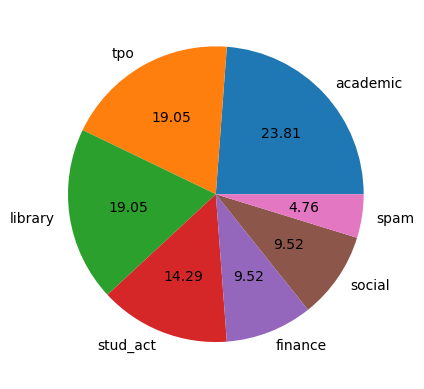

In [18]:
# pie chart of the classes
plt.pie(df['class'].value_counts(), labels = ['academic', 'tpo', 'library', 'stud_act', 'finance', 'social', 'spam'], autopct= '%0.2f')
plt.show

##### Data is Imbalancled

### Analysis Using NLTK (Natural Language Toolkit)

In [19]:
#using nltk library for further analysis
nltk.download('punkt')
print("Dependencies downloaded Successfully")

Dependencies downloaded Successfully


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bahad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Now We will add 3 more columns to the dataframe
##### 1. No. of characters of the message
##### 2. No. of words of the message
##### 2. No. of sentences of the message

In [20]:
# counting no. of characters
df['char_no'] = df['body'].apply(len)
print('No. of Character Column added.')

No. of Character Column added.


In [21]:
# counting no of words
df['word_no'] = df['body'].apply(lambda x:len(nltk.word_tokenize(x)))
print('No. of Words Column added.')

No. of Words Column added.


In [22]:
# counting the no of sentences
df['sent_no'] = df['body'].apply(lambda x: len(nltk.sent_tokenize(x)))
print('No. of Sentences Column Added')

No. of Sentences Column Added


In [23]:
df.head()

,target,class,body,tone,priority,char_no,word_no,sent_no
0,0,6,"Dear J P Morgan Chase 2026 batch Registered,\n...",1,0,375,70,2
1,0,0,"Dear students,\n kindly prepare the current se...",1,0,451,80,5
2,0,0,Motivation:Tell about motivation .\nObjectives...,1,0,760,130,12
3,0,1,It is observed that many students have paid fe...,1,0,253,46,3
4,0,0,In view of NAAC visit on 28th and 29th May 202...,1,0,477,93,4


In [24]:
# analysis on new 3 columns
df[['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,21.000000,21.000000,21.000000
mean,333.761905,60.047619,3.523810
std,162.579797,29.042170,2.856905
min,74.000000,13.000000,1.000000
25%,242.000000,41.000000,2.000000
50%,299.000000,58.000000,3.000000
75%,429.000000,80.000000,4.000000
max,760.000000,130.000000,12.000000


In [25]:
#analysis of each class of the message, class 0 
df[df['class'] == 0][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,5.000000,5.000000,5.000000
mean,478.800000,88.200000,7.200000
std,171.269378,26.536767,3.563706
min,299.000000,58.000000,4.000000
25%,407.000000,80.000000,5.000000
50%,451.000000,80.000000,5.000000
75%,477.000000,93.000000,10.000000
max,760.000000,130.000000,12.000000


In [26]:
#analysis of each class of the message, class 1 
df[df['class'] == 1][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,2.000000,2.000000,2.0
mean,341.000000,65.000000,3.0
std,124.450793,26.870058,0.0
min,253.000000,46.000000,3.0
25%,297.000000,55.500000,3.0
50%,341.000000,65.000000,3.0
75%,385.000000,74.500000,3.0
max,429.000000,84.000000,3.0


In [27]:
#analysis of each class of the message, class 2
df[df['class'] == 2][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,4.000000,4.000000,4.00000
mean,254.000000,43.500000,1.50000
std,17.682383,4.434712,0.57735
min,237.000000,39.000000,1.00000
25%,240.750000,40.500000,1.00000
50%,252.000000,43.000000,1.50000
75%,265.250000,46.000000,2.00000
max,275.000000,49.000000,2.00000


C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='word_no', ylabel='Count'>

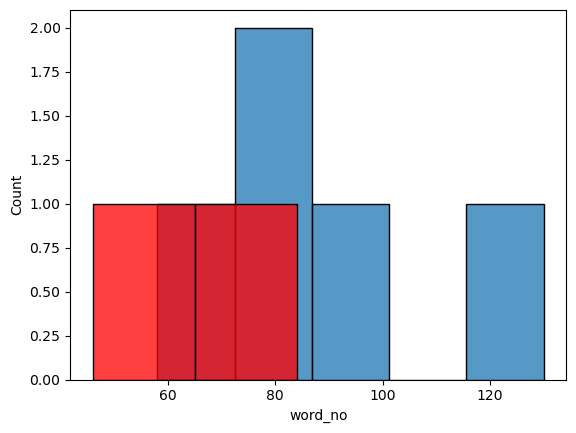

In [28]:
# visual analysis with the help of seaborn library
sns.histplot(df[df['class'] == 0]['word_no'])
sns.histplot(df[df['class'] == 1]['word_no'], color='red')

C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='char_no', ylabel='Count'>

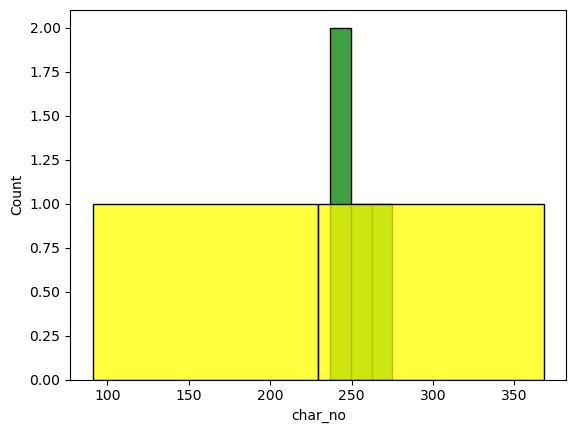

In [29]:

sns.histplot(df[df['class'] == 2]['char_no'], color='green')
sns.histplot(df[df['class'] == 3]['char_no'], color='yellow')

C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='char_no', ylabel='Count'>

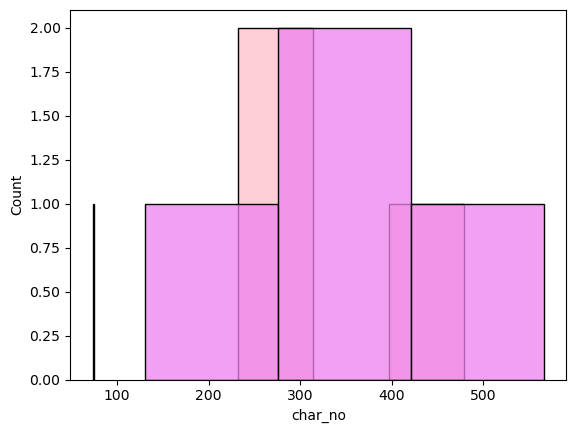

In [30]:

sns.histplot(df[df['class'] == 4]['char_no'], color='orange')
sns.histplot(df[df['class'] == 5]['char_no'], color='pink')
sns.histplot(df[df['class'] == 6]['char_no'], color='violet')

C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

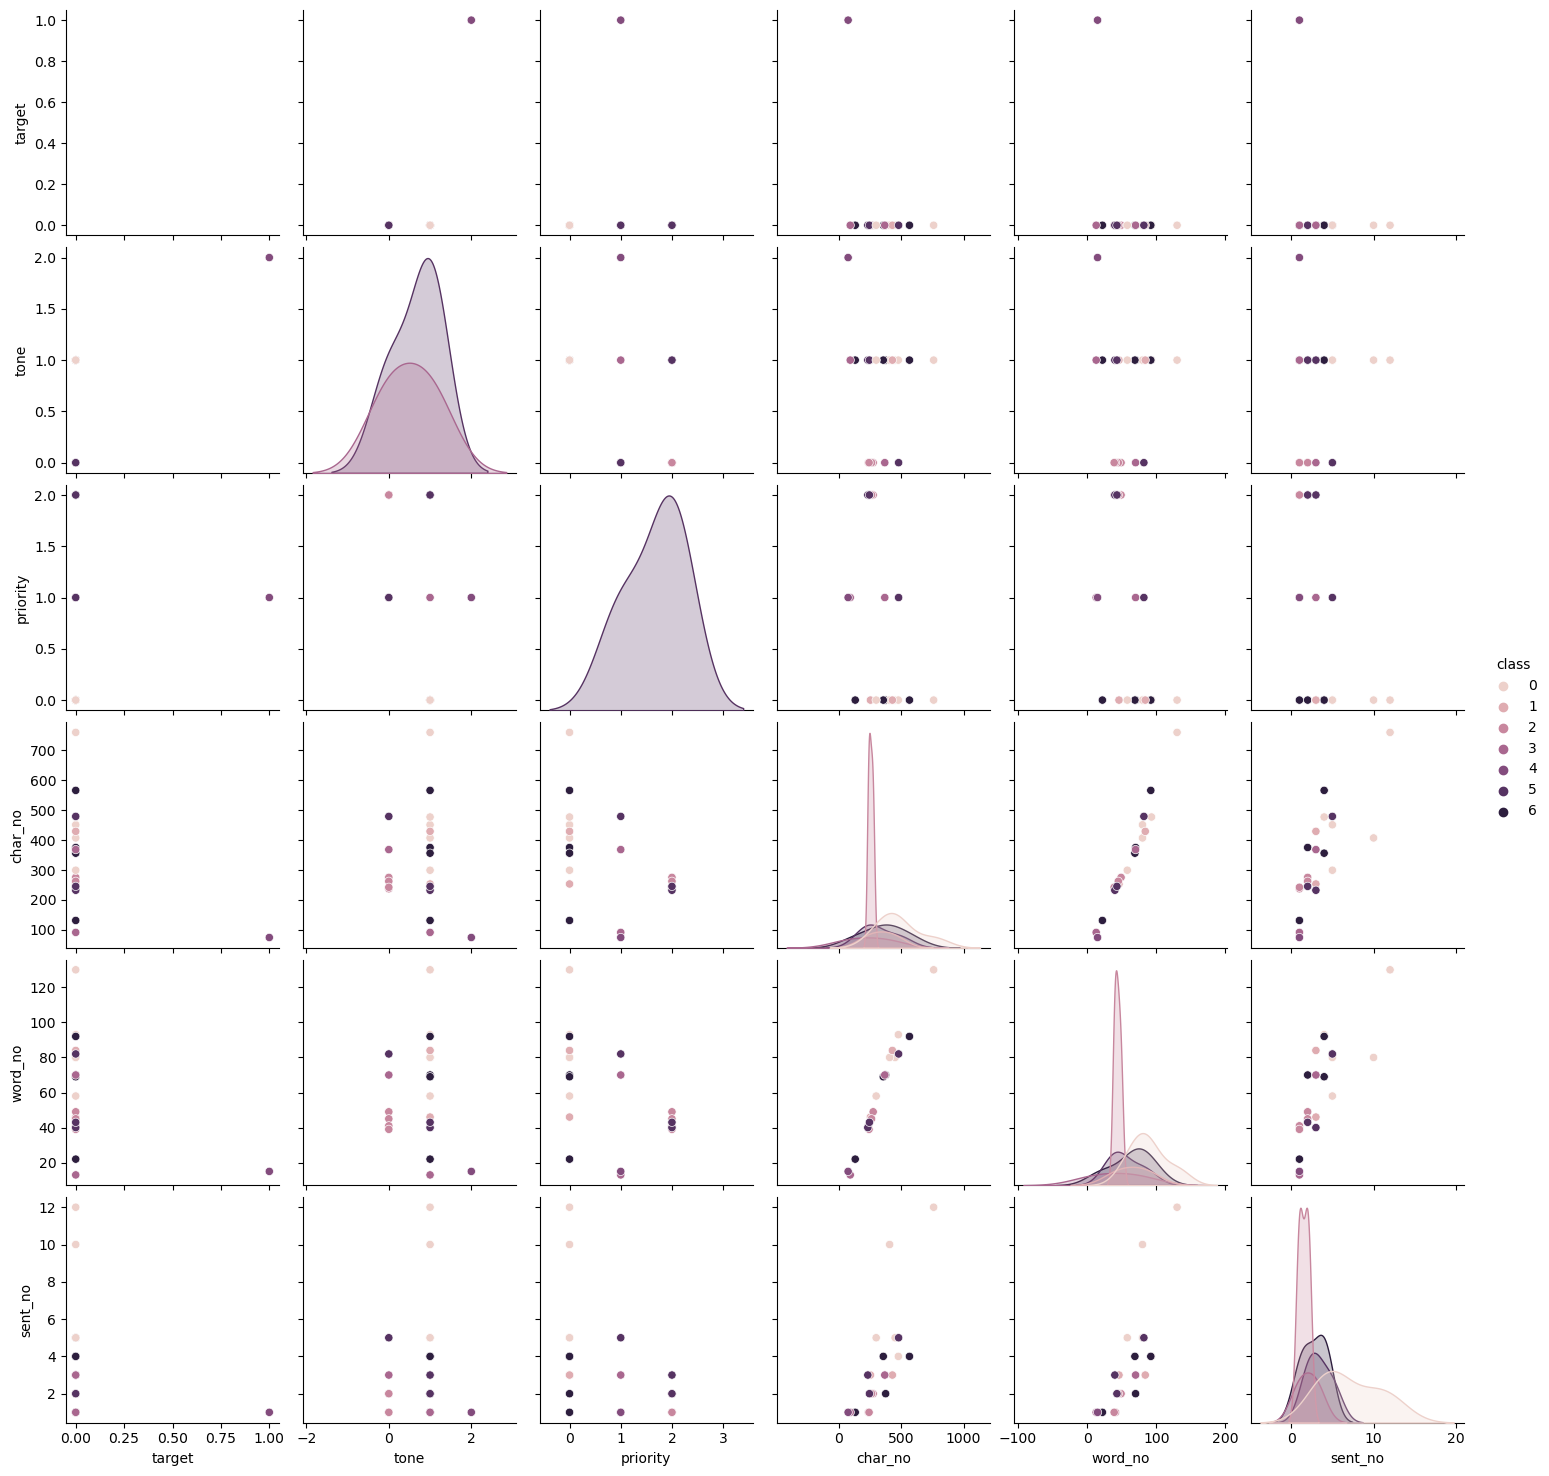

In [31]:
# co-relation of no. of character, no. of words, no. of sentences
sns.pairplot(df, hue='class')

In [32]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,target,class,tone,priority,char_no,word_no,sent_no
target,1.000000,0.118913,0.526355,0.061360,-0.366091,-0.355404,-0.202414
class,0.118913,1.000000,0.082812,0.148265,-0.262369,-0.309827,-0.441791
tone,0.526355,0.082812,1.000000,-0.541599,-0.068583,-0.034378,0.149993
priority,0.061360,0.148265,-0.541599,1.000000,-0.464273,-0.516560,-0.479933
char_no,-0.366091,-0.262369,-0.068583,-0.464273,1.000000,0.987757,0.771583
word_no,-0.355404,-0.309827,-0.034378,-0.516560,0.987757,1.000000,0.781285
sent_no,-0.202414,-0.441791,0.149993,-0.479933,0.771583,0.781285,1.000000


<Axes: >

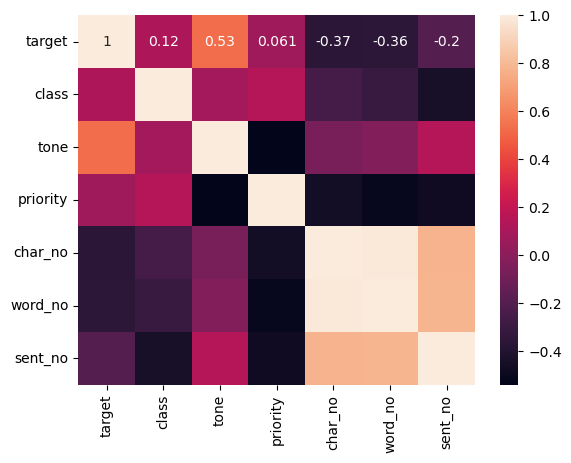

In [33]:
sns.heatmap(numeric_df.corr(), annot=True)

##### tells that relation betn chars, words and sentences is multi collinear

### Stage 3: Text Data Preprocessing
* Removing Unneccesary Characters like '\n'
* Lower Case
* Tokenisation
* Remove Special Characters
* REmove Stop Words
* Stemming

In [34]:
df['body'][0]

'Dear J P Morgan Chase 2026 batch Registered,\nPlease see the attachment for the shortlist and  go through below mail received from the company \nShortlisted students are instructed to come in TPO office tomorrow (9th May 2024), 12.30 to 1 pm only and fill required true information. If anybody will be absent or fill  incorrect information, strict action will be taken by CTPO.'

In [35]:
# removing the '\n' from the msg body
df['body'] = df['body'].str.replace('\n', '', regex=False)
print('Removed backslash n from the messages')

Removed backslash n from the messages


In [36]:
# downloading and importing the stop words 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [89]:
# stemming the words and create an object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print('Loaded the PorterStemmer')

Loaded the PorterStemmer


In [38]:
# function to take 5 further steps:
def text_transform(text):
#     to lowecase
    text = text.lower()
#     cut the sentences in words
    text = nltk.word_tokenize(text)
#     make a list and append only the apla-numeric characters in it(REMOVES THE SPECIAL CHARS)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
#     clone the list back in text
    text = y[:]
    y.clear()
    
#     remove stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in st.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
#     stemming the words
    for i in text:
        stemmed_word = ps.stem(i)
        y.append(stemmed_word)
        
#       return 'y' list in the form of a string
    return " ".join(y)

print('Function Defined Successfully')

Function Defined Successfully


In [39]:
text_transform('Dear J P Morgan Chase 2026 batch Registered,\nPlease see the attachment for the shortlist and  go through below mail received from the company \nShortlisted students are instructed to come in TPO office tomorrow (9th May 2024), 12.30 to 1 pm only and fill required true information. If anybody will be absent or fill  incorrect information, strict action will be taken by CTPO.')

'dear j p morgan chase 2026 batch regist pleas see attach shortlist go mail receiv compani shortlist student instruct come tpo offic tomorrow 9th may 2024 1 pm fill requir true inform anybodi absent fill incorrect inform strict action taken ctpo'

In [40]:
# preprocessing the texts in body
df['transformed_text'] = df['body'].apply(text_transform)
print('A new column created for Transformed Text')

A new column created for Transformed Text


In [41]:
df.head()

,target,class,body,tone,priority,char_no,word_no,sent_no,transformed_text
0,0,6,"Dear J P Morgan Chase 2026 batch Registered,Pl...",1,0,375,70,2,dear j p morgan chase 2026 batch regist pleas ...
1,0,0,"Dear students, kindly prepare the current sem ...",1,0,451,80,5,dear student kindli prepar current sem edi vid...
2,0,0,Motivation:Tell about motivation .Objectives: ...,1,0,760,130,12,motiv tell motiv outlin object project tri ach...
3,0,1,It is observed that many students have paid fe...,1,0,253,46,3,observ mani student paid fee year use rtg fill...
4,0,0,In view of NAAC visit on 28th and 29th May 202...,1,0,477,93,4,view naac visit 28th 29th may 2024 pfa program...


### Creating A word Cloud for every class

In [88]:
# import worlcloud and create an object
from wordcloud import WordCloud
wc = WordCloud(width=200, height=200, min_font_size=10, background_color='white')
print('WordCloud Imported')

WordCloud Imported


Class 0 WordCloud Genereated


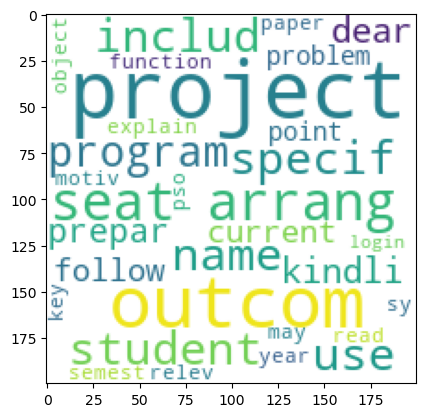

In [43]:
# wordcloud for class 0
aca_wc = wc.generate(df[df['class'] == 0]['transformed_text'].str.cat(sep=' '))
print("Class 0 WordCloud Genereated")
plt.imshow(aca_wc)

Class 1 WordCloud Genereated


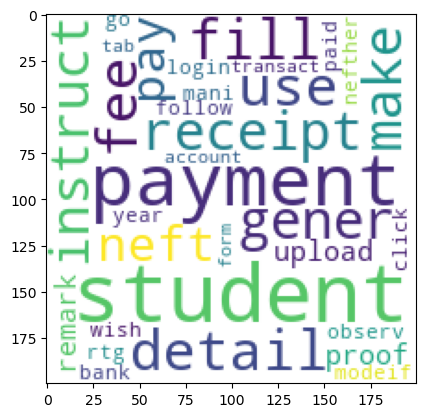

In [44]:
# wordcloud for class 1
fin_wc = wc.generate(df[df['class'] == 1]['transformed_text'].str.cat(sep=' '))
print("Class 1 WordCloud Genereated")
plt.imshow(fin_wc)

Class 2 Wordcloud Generated


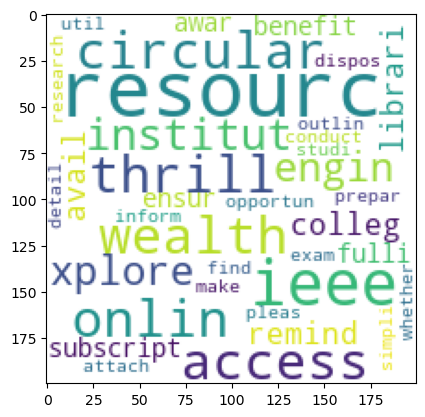

In [45]:
# wordcloud for class 2
lib_wc = wc.generate(df[df['class'] == 2]['transformed_text'].str.cat(sep=' '))
print('Class 2 Wordcloud Generated')
plt.imshow(lib_wc)

Class 3 WC generated


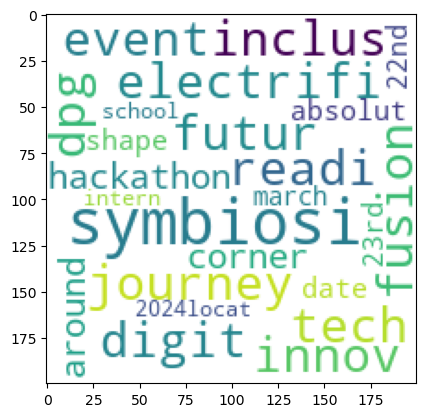

In [46]:
# cloud for class 3
soc_wc = wc.generate(df[df['class']==3]['transformed_text'].str.cat(sep=' '))
print("Class 3 WC generated")
plt.imshow(soc_wc)

Class 4 WC generated


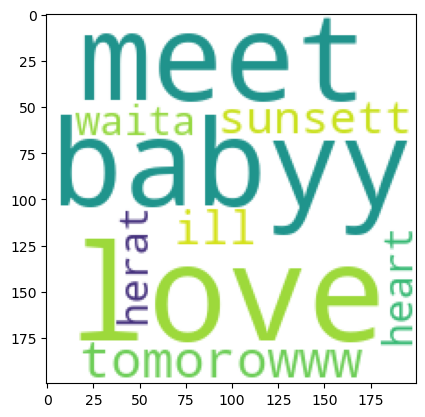

In [47]:
# cloud for class 4
sp_wc = wc.generate(df[df['class']==4]['transformed_text'].str.cat(sep=' '))
print("Class 4 WC generated")
plt.imshow(sp_wc)

Class 5 WC generated


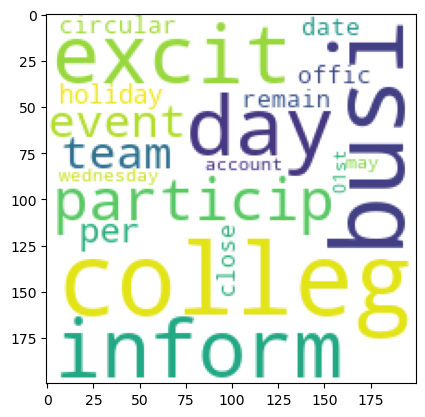

In [48]:
# cloud for class 5
studact_wc = wc.generate(df[df['class']==5]['transformed_text'].str.cat(sep=' '))
print("Class 5 WC generated")
plt.imshow(studact_wc)

Class 6 WC generated


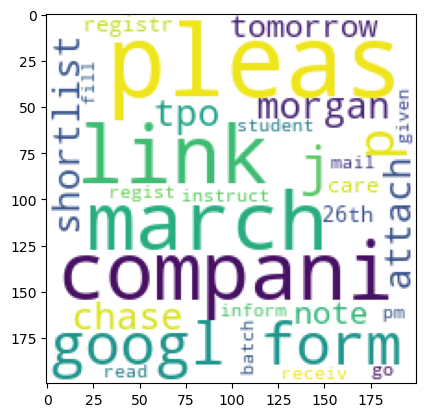

In [49]:
# cloud for class 6
tpo_wc = wc.generate(df[df['class']==6]['transformed_text'].str.cat(sep=' '))
print("Class 6 WC generated")
plt.imshow(tpo_wc)

# Pluck out the most used words used in a one type of the class

In [50]:
#importing the collections library 
from collections import Counter
print('Collections Counter imported Successfully')

Collections Counter imported Successfully


#### Class 0: most Words

In [51]:
# plucking out used words from class 0
class_0 = [] #empty list
for msg in df[df['class'] == 0]['transformed_text'].to_list():
    for words in msg.split():
        class_0.append(words)
        
print('Words spiltted, and added to a list')

Words spiltted, and added to a list


In [52]:
# creating a dataframe for most common words of class 0
class_0_df = pd.DataFrame(Counter(class_0).most_common(10))
print("Created a Dataframe for Class 0 common words")

Created a Dataframe for Class 0 common words


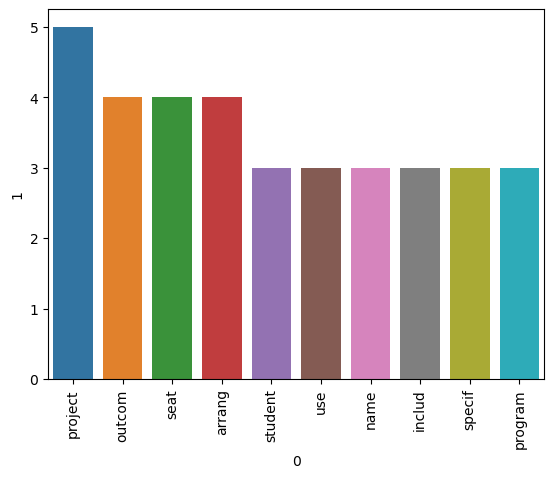

In [53]:
# plotting a bar graph to see the top 10 words of class 0
sns.barplot(x=class_0_df.columns[0], y=class_0_df.columns[1], data=class_0_df)
plt.xticks(rotation='vertical')
plt.show()

#### Class 1: most words

In [54]:
# plucking out used words in CLass 1
class_1 = [] # empty list
for msg in df[df['class']==1]['transformed_text'].to_list():
    for words in msg.split():
        class_1.append(words)
print('Words Splited, and added to a list')

Words Splited, and added to a list


In [55]:
# creating a dataframe for most used words in class 1
class_1_df = pd.DataFrame(Counter(class_1).most_common(10))
print("Created a DAtaframe for most used words of Class 2")

Created a DAtaframe for most used words of Class 2


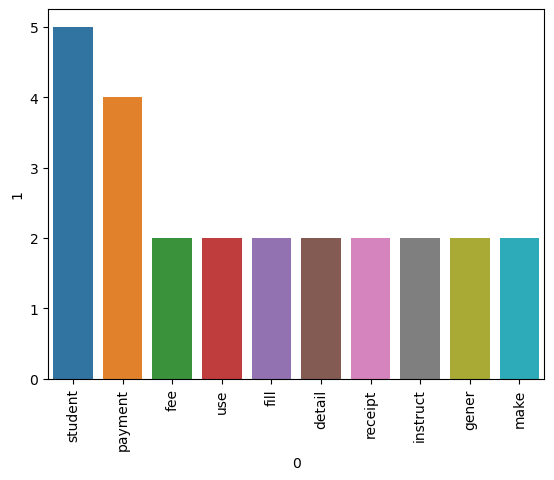

In [56]:
# plotting a barplot for most used words
sns.barplot(x=class_1_df[0], y = class_1_df[1], data=class_1_df)
plt.xticks(rotation='vertical')
plt.show()

#### Class 2 : most Words

In [57]:
# plucking out the words used in class 2
class_2 = [] #empty list
for msg in df[df['class']==2]['transformed_text'].to_list():
    for words in msg.split():
        class_2.append(words)
        
print("Words Splitted, added to a list")

Words Splitted, added to a list


In [58]:
# creating a dataframe for most used words
class_2_df = pd.DataFrame(Counter(class_2).most_common(10))
print('DataFrame created for most common words in class 2')

DataFrame created for most common words in class 2


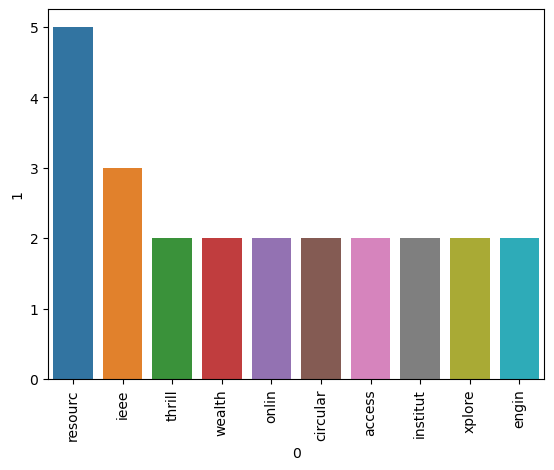

In [59]:
# creating a barplot for most used words in class 2
sns.barplot(x=class_2_df[0], y=class_2_df[1], data=class_2_df)
plt.xticks(rotation='vertical')
plt.show()

#### Class 3 : most WOrds

In [60]:
# plucking out the words used in class 3
class_3 = [] #empty list
for msg in df[df['class']==3]['transformed_text'].to_list():
    for words in msg.split():
        class_3.append(words)
        
print("Words Splitted, added to a list")

Words Splitted, added to a list


In [61]:
# creating a dataframe for most used words
class_3_df = pd.DataFrame(Counter(class_3).most_common(10))
print('DataFrame created for most common words in class 3')

DataFrame created for most common words in class 3


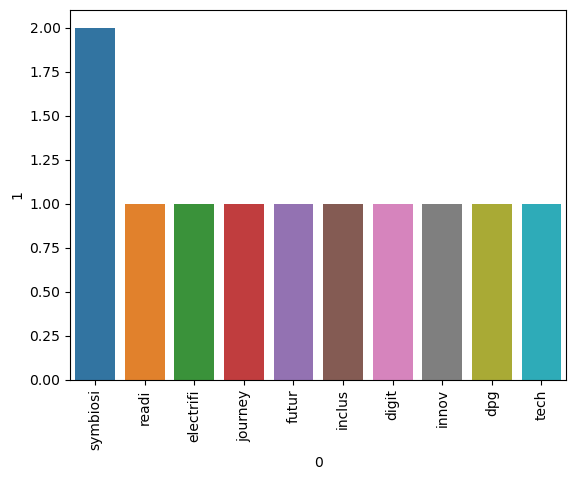

In [62]:
# creating a barplot for most used words in class 3
sns.barplot(x=class_3_df[0], y=class_3_df[1], data=class_3_df)
plt.xticks(rotation='vertical')
plt.show()

#### CLass 4: most Words

In [63]:
# plucking out the words used in class 4
class_4 = [] #empty list
for msg in df[df['class']==4]['transformed_text'].to_list():
    for words in msg.split():
        class_4.append(words)
        
print("Words Splitted, added to a list")

# creating a dataframe for most used words
class_4_df = pd.DataFrame(Counter(class_4).most_common(5))
print('DataFrame created for most common words in class 4')

# creating a barplot for most used words in class 4
# sns.barplot(x=class_4_df[0], y=class_4_df[1], data=class_4_df)
# plt.xticks(rotation='vertical')
# plt.show()

Words Splitted, added to a list
DataFrame created for most common words in class 4


#### Class 5 : most Words

Words Splitted, added to a list
DataFrame created for most common words in class 5


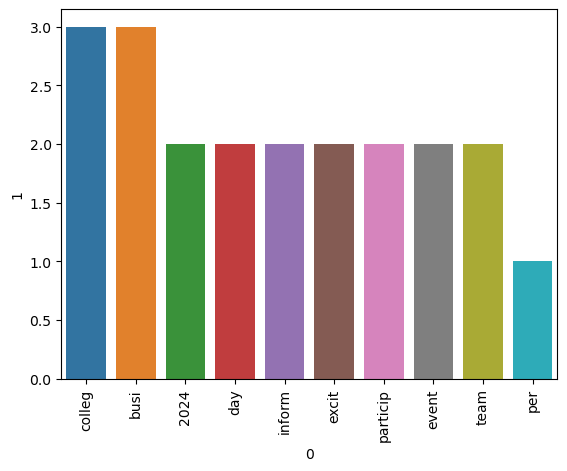

In [64]:
# plucking out the words used in class 5
class_5 = [] #empty list
for msg in df[df['class']==5]['transformed_text'].to_list():
    for words in msg.split():
        class_5.append(words)
        
print("Words Splitted, added to a list")

# creating a dataframe for most used words
class_5_df = pd.DataFrame(Counter(class_5).most_common(10))
print('DataFrame created for most common words in class 5')

# creating a barplot for most used words in class 5
sns.barplot(x=class_5_df[0], y=class_5_df[1], data=class_5_df)
plt.xticks(rotation='vertical')
plt.show()

#### Class 6: most Words

Words Splitted, added to a list
DataFrame created for most common words in class 6


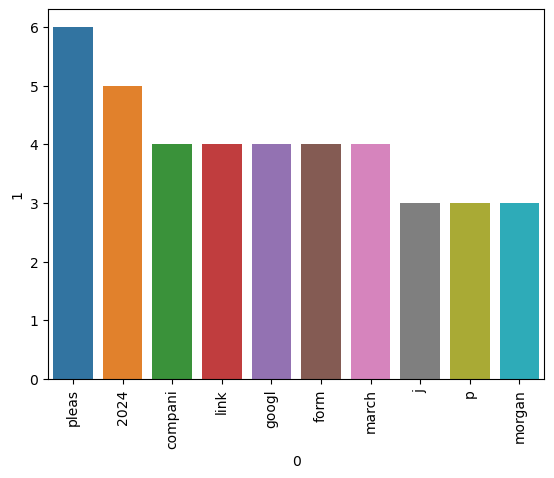

In [65]:
# plucking out the words used in class 5
class_6 = [] #empty list
for msg in df[df['class']==6]['transformed_text'].to_list():
    for words in msg.split():
        class_6.append(words)
        
print("Words Splitted, added to a list")

# creating a dataframe for most used words
class_6_df = pd.DataFrame(Counter(class_6).most_common(10))
print('DataFrame created for most common words in class 6')

# creating a barplot for most used words in class 5
sns.barplot(x=class_6_df[0], y=class_6_df[1], data=class_6_df)
plt.xticks(rotation='vertical')
plt.show()

# Stage 4: Model Building
* Naive Bayes Algorithm(usually best for text based Classification)

In [87]:
# import the vectoriser function from Scikit learn library and creating the object
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
print('Vectoriser Imported')

Vectoriser Imported


In [77]:
# creating a matrix that would tell whether a word is present in a text or not
X = cv.fit_transform(df['transformed_text']).toarray()
print('Created a sprase matrix of transformed text column and converted it to an array')

Created a sprase matrix of transformed text column and converted it to an array


In [78]:
# this matrix tells that words in a column is present in a text of which of the rows in the current dataset
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
# (r = no of entries in the dataset(total emails), c = total number of words from all the dataset)
X.shape

(21, 361)

In [84]:
# taking all the types of emails into an array
y = df['class'].values
print(f'Classes of the emails are:  {y}')
y.shape

Classes of the emails are:  [6 0 0 1 0 2 2 0 2 2 6 6 6 1 5 5 3 3 5 0 4]


(21,)

### Training the Model (Naive Bayes ALgorithm)

##### Requiring the Library

In [85]:
# importing the library for training
from sklearn.model_selection import train_test_split
print('Training Library imported')

Training Library imported


In [90]:
# requiring the different types of Naive Bayes Algorithms and creating their objects
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
print('Libraries Imported and Objects Created')

Libraries Imported and Objects Created


In [91]:
# importing metrics library
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print('Imported Metric libraries')

Imported Metric libraries


##### Splitting

In [96]:
# spliting the content using train_test_split, test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print('Splitting of the Contents DONE')

Splitting of the Contents DONE


##### Training : GNB

In [110]:
# training the model using GNB
gnb.fit(X_train, y_train)

# predict
y_pred1 = gnb.predict(X_test)

# print the scores
print('Accuracy: ', accuracy_score(y_test, y_pred1))
print('CF: \n', confusion_matrix(y_test, y_pred1))
print('Precision: ', precision_score(y_test, y_pred1, average='weighted', zero_division=0))

Accuracy:  0.6
CF: 
 [[0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 1]]
Precision:  0.8


##### Training : MNB

In [111]:
# training using MNB
mnb.fit(X_train, y_train)

# predicting
y_pred2 = mnb.predict(X_test)

# metrics
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print('CF: \n', confusion_matrix(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2, average='weighted', zero_division=0))

Accuracy:  1.0
CF: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 2]]
Precision:  1.0


##### Training : BNB

In [113]:
# training using BNB
bnb.fit(X_train, y_train)

# predicting
y_pred3 = bnb.predict(X_test)

# metrics
print('Accuracy: ', accuracy_score(y_test, y_pred3))
print('CF: \n', confusion_matrix(y_test, y_pred3))
print('Precision: ', precision_score(y_test, y_pred3, average='weighted', zero_division=0))

Accuracy:  0.0
CF: 
 [[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [2 0 0 0 0]]
Precision:  0.0


##### So far the best is Multinomial NB